In [17]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
sns.set(style='darkgrid', font='SimHei', font_scale=1.3)

#### **以TITLE (職等)分群再建模**

In [33]:
df1 = pd.read_excel('data/df1.xlsx')
df2 = pd.read_excel('data/df2.xlsx')
df3 = pd.read_excel('data/df3.xlsx')
df4 = pd.read_excel('data/df4.xlsx')

In [34]:
drop_columns = ['MIXED_PREMIUM', 
                'SENIORITY',
                'AGENT_AGE',
                'AGENT_ID',
                'ON_BOARD_AGE',
                'START_DATE',
                'END_DATE']

dummy_columns = ['ISABLE', 
                'AGENT_SEX',
                'CITY',
                'DISTRICT',
                'LOCATION_ID',
                'TITLE']

**基層**

In [36]:
modelData = df1.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.3, random_state=123)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = train['top_PERFORMANCE']
y_test = test['top_PERFORMANCE']

labelen = LabelEncoder()
y_train = labelen.fit_transform(np.array(y_train))
y_test = labelen.fit_transform(np.array(y_test))

print('---- XGBoost ------')
xgb = XGBClassifier()
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- Random Forest ------')
rf = RandomForestClassifier()
classifier = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- XGBoost ------
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2534
           1       0.48      0.25      0.33       823

    accuracy                           0.75      3357
   macro avg       0.64      0.58      0.59      3357
weighted avg       0.71      0.75      0.72      3357



Predicted,0,1
Actual,,
0,2313,221
1,616,207


---- Random Forest ------
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2534
           1       0.55      0.12      0.20       823

    accuracy                           0.76      3357
   macro avg       0.66      0.54      0.53      3357
weighted avg       0.72      0.76      0.70      3357



Predicted,0,1
Actual,,
0,2452,82
1,723,100


**業務主管**

In [37]:
modelData = df2.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.3, random_state=123)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = train['top_PERFORMANCE']
y_test = test['top_PERFORMANCE']

labelen = LabelEncoder()
y_train = labelen.fit_transform(np.array(y_train))
y_test = labelen.fit_transform(np.array(y_test))

print('---- XGBoost ------')
xgb = XGBClassifier()
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- Random Forest ------')
rf = RandomForestClassifier()
classifier = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- XGBoost ------
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       192
           1       0.43      0.19      0.26        81

    accuracy                           0.68       273
   macro avg       0.58      0.54      0.53       273
weighted avg       0.64      0.68      0.64       273



Predicted,0,1
Actual,,
0,172,20
1,66,15


---- Random Forest ------
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       192
           1       0.50      0.04      0.07        81

    accuracy                           0.70       273
   macro avg       0.60      0.51      0.45       273
weighted avg       0.65      0.70      0.60       273



Predicted,0,1
Actual,,
0,189,3
1,78,3


**行銷主管**

In [38]:
modelData = df3.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.3, random_state=123)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = train['top_PERFORMANCE']
y_test = test['top_PERFORMANCE']

labelen = LabelEncoder()
y_train = labelen.fit_transform(np.array(y_train))
y_test = labelen.fit_transform(np.array(y_test))

print('---- XGBoost ------')
xgb = XGBClassifier()
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- Random Forest ------')
rf = RandomForestClassifier()
classifier = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- XGBoost ------
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1359
           1       0.42      0.21      0.28       443

    accuracy                           0.74      1802
   macro avg       0.60      0.56      0.56      1802
weighted avg       0.69      0.74      0.70      1802



Predicted,0,1
Actual,,
0,1234,125
1,352,91


---- Random Forest ------
              precision    recall  f1-score   support

           0       0.76      0.97      0.86      1359
           1       0.47      0.08      0.14       443

    accuracy                           0.75      1802
   macro avg       0.62      0.53      0.50      1802
weighted avg       0.69      0.75      0.68      1802



Predicted,0,1
Actual,,
0,1319,40
1,407,36


**通訊處主管**

In [39]:
modelData = df4.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.3, random_state=123)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = train['top_PERFORMANCE']
y_test = test['top_PERFORMANCE']

labelen = LabelEncoder()
y_train = labelen.fit_transform(np.array(y_train))
y_test = labelen.fit_transform(np.array(y_test))

print('---- XGBoost ------')
xgb = XGBClassifier()
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- Random Forest ------')
rf = RandomForestClassifier()
classifier = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- XGBoost ------
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        74
           1       0.08      0.04      0.06        24

    accuracy                           0.65        98
   macro avg       0.41      0.45      0.42        98
weighted avg       0.57      0.65      0.61        98



Predicted,0,1
Actual,,
0,63,11
1,23,1


---- Random Forest ------
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        74
           1       0.33      0.12      0.18        24

    accuracy                           0.72        98
   macro avg       0.55      0.52      0.51        98
weighted avg       0.66      0.72      0.67        98



Predicted,0,1
Actual,,
0,68,6
1,21,3


----

### **以Kmeans 分群建模**

In [2]:
c_df1 = pd.read_excel('data/c_df1.xlsx')
c_df2 = pd.read_excel('data/c_df2.xlsx')
c_df3 = pd.read_excel('data/c_df3.xlsx')
drop_columns = ['MIXED_PREMIUM', 
                'SENIORITY',
                'AGENT_AGE',
                'AGENT_ID',
                'ON_BOARD_AGE',
                'START_DATE',
                'cluster_3']
dummy_columns = ['ISABLE', 
                'AGENT_SEX',
                'CITY',
                'DISTRICT',
                'LOCATION_ID',
                'TITLE']

#### **cluster-0**

In [27]:
modelData = c_df1.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.2, random_state=0)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = np.array(train['top_PERFORMANCE'])
y_test = np.array(test['top_PERFORMANCE'])

print('---- Random Forest ------')
rf = RandomForestClassifier()
rf_clf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- XGBoost ------')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.3)
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}

confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- Random Forest ------
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       539
           1       0.55      0.11      0.19       184

    accuracy                           0.75       723
   macro avg       0.66      0.54      0.52       723
weighted avg       0.71      0.75      0.68       723



Predicted,0,1
Actual,,
0,522,17
1,163,21


---- XGBoost ------
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       539
           1       0.42      0.23      0.30       184

    accuracy                           0.72       723
   macro avg       0.60      0.56      0.56       723
weighted avg       0.68      0.72      0.69       723



Predicted,0,1
Actual,,
0,479,60
1,141,43


**XAI- SHAP**

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


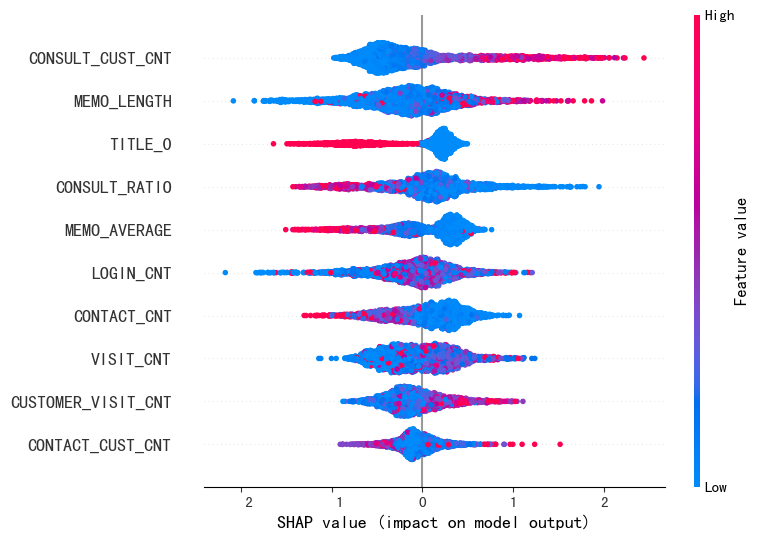

In [4]:
explainer = shap.Explainer(classifier)
shape_values = explainer.shap_values(X_train)
shap.summary_plot(shape_values, X_train, max_display=10)


**Importance Feature**

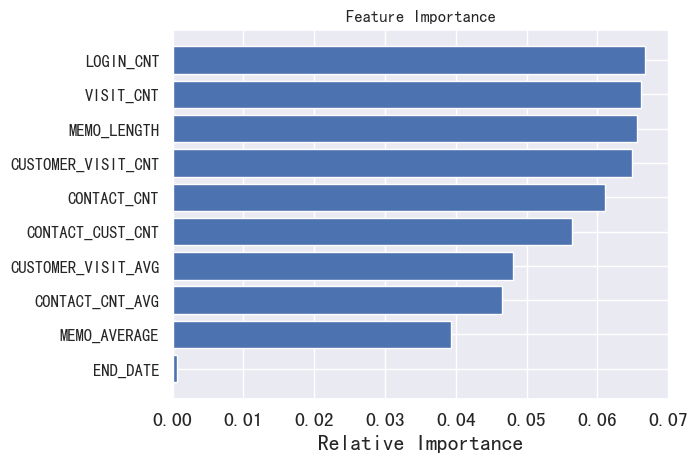

In [28]:
topn = 10
importance = rf.feature_importances_[:topn]
indices = np.argsort(importance)[:topn]
features = X_train.columns[:topn]
plt.title('Feature Importance', fontsize=12)
plt.barh(range(len(indices[:topn])),
        importance[indices], 
        color='b',
        align='center')
plt.yticks(range(len(indices[:topn])),
            [features[i] for i in indices],
            fontsize=12)
plt.xlabel('Relative Importance')
plt.show()

**Grid Search**

In [65]:
params = {'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.001],
        'n_estimators:': [100, 500, 1000],
        'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(estimator= xgb,
                param_grid=params,
                scoring='neg_mean_squared_error',
                verbose=1,
                error_score='raise')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[15:31:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators:" } are not used.

[15:31:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators:" } are not used.

[15:31:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators:" } are not used.

[15:31:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators:" } are not used.

[15:31:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators:" } are not used.

[15

GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_r...
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.001],
                         'max_depth': [3, 6, 10],
                         'n_estimators:': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
print('---- Grid Search: XGBoost ------')
y_pred = clf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}

confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)
print('best params', clf.best_params_)

---- Grid Search: XGBoost ------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       539
           1       0.78      0.08      0.14       184

    accuracy                           0.76       723
   macro avg       0.77      0.53      0.50       723
weighted avg       0.76      0.76      0.68       723



Predicted,0,1
Actual,,
0,535,4
1,170,14


best params {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators:': 100}


#### **cluster-1**

In [34]:
modelData = c_df2.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.2, random_state=0)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = np.array(train['top_PERFORMANCE'])
y_test = np.array(test['top_PERFORMANCE'])


print('---- Random Forest ------')
rf = RandomForestClassifier()
classifier = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- XGBoost ------')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05)
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}

confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- Random Forest ------
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1488
           1       0.57      0.32      0.41       487

    accuracy                           0.77      1975
   macro avg       0.69      0.62      0.64      1975
weighted avg       0.75      0.77      0.75      1975



Predicted,0,1
Actual,,
0,1371,117
1,330,157


---- XGBoost ------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1488
           1       0.62      0.34      0.44       487

    accuracy                           0.79      1975
   macro avg       0.71      0.64      0.65      1975
weighted avg       0.76      0.79      0.76      1975



Predicted,0,1
Actual,,
0,1383,105
1,319,168


**XAI- SHAP**

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


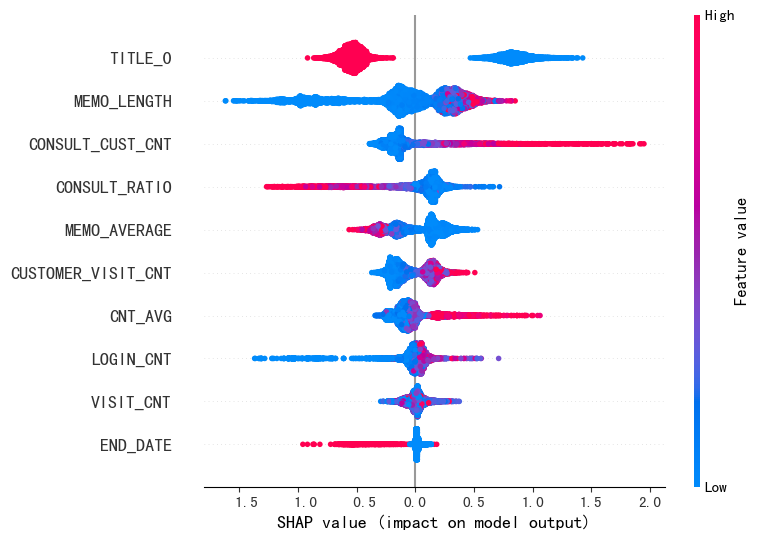

In [9]:
explainer = shap.Explainer(classifier)
shape_values = explainer.shap_values(X_train)
shap.summary_plot(shape_values, X_train, max_display=10)

**Importance Feature**

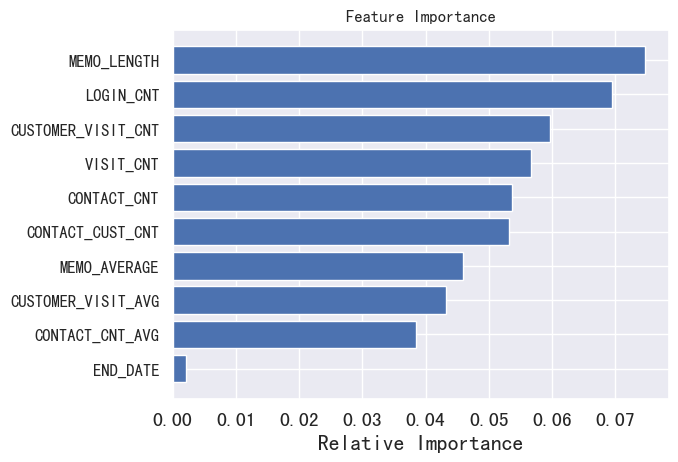

In [35]:
topn = 10
importance = rf.feature_importances_[:topn]
indices = np.argsort(importance)[:topn]
features = X_train.columns[:topn]
plt.title('Feature Importance', fontsize=12)
plt.barh(range(len(indices[:topn])),
        importance[indices], 
        color='b',
        align='center')
plt.yticks(range(len(indices[:topn])),
            [features[i] for i in indices],
            fontsize=12)
plt.xlabel('Relative Importance')
plt.show()

#### **cluster-2**

In [31]:
modelData = c_df3.drop(columns=drop_columns)
modelData = pd.get_dummies(modelData, columns=dummy_columns)

train, test = train_test_split(modelData, test_size=0.2, random_state=0)
X_train = train.drop(columns='top_PERFORMANCE')
X_test = test.drop(columns='top_PERFORMANCE')
y_train = np.array(train['top_PERFORMANCE'])
y_test = np.array(test['top_PERFORMANCE'])


print('---- Random Forest ------')
rf = RandomForestClassifier()
classifier = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}
confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

print('---- XGBoost ------')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.3)
classifier = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df = {'y_actual': list(y_test),
    'y_predicted': list(y_pred)}

confusion = pd.crosstab(df['y_actual'], 
            df['y_predicted'], 
            rownames=['Actual'], 
            colnames=['Predicted'])
print(classification_report(np.array(y_test), y_pred))
display(confusion)

---- Random Forest ------
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       749
           1       0.58      0.26      0.36       239

    accuracy                           0.78       988
   macro avg       0.69      0.60      0.61       988
weighted avg       0.75      0.78      0.74       988



Predicted,0,1
Actual,,
0,703,46
1,176,63


---- XGBoost ------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       749
           1       0.49      0.28      0.36       239

    accuracy                           0.76       988
   macro avg       0.65      0.60      0.61       988
weighted avg       0.72      0.76      0.73       988



Predicted,0,1
Actual,,
0,679,70
1,171,68


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


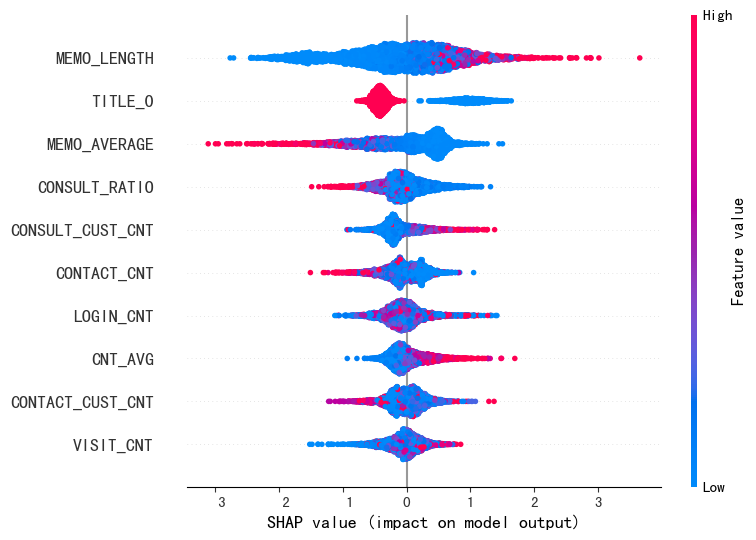

In [12]:
explainer = shap.Explainer(classifier)
shape_values = explainer.shap_values(X_train)
shap.summary_plot(shape_values, X_train, max_display=10)

**Importance Feature**

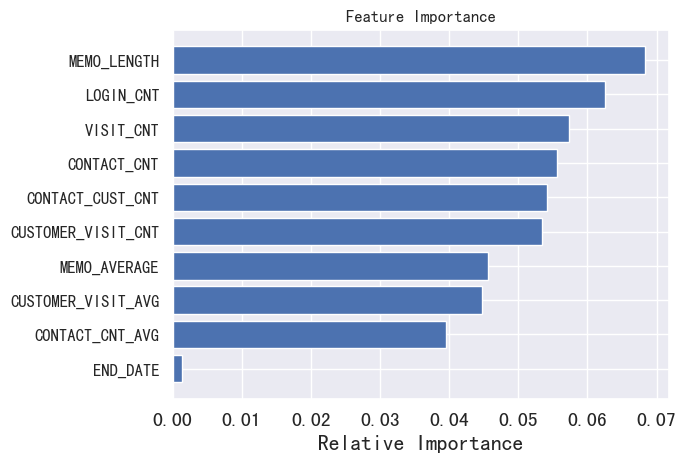

In [33]:
topn = 10
importance = rf.feature_importances_[:topn]
indices = np.argsort(importance)[:topn]
features = X_train.columns[:topn]
plt.title('Feature Importance', fontsize=12)
plt.barh(range(len(indices[:topn])),
        importance[indices], 
        color='b',
        align='center')
plt.yticks(range(len(indices[:topn])),
            [features[i] for i in indices],
            fontsize=12)
plt.xlabel('Relative Importance')
plt.show()